In [2]:
from tf_unet import unet, util, image_util
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# load all training images
data_provider = image_util.ImageDataProvider("/fast_drive/ARIC/training/*/a4cesv-[123].jpg", data_suffix=".jpg", mask_suffix="-mask.png")

Number of files used: 11340


In [11]:
# setup & training
output_path = 'output'
net = unet.Unet(layers=3, features_root=64, channels=3, n_class=2)
trainer = unet.Trainer(net)
path = trainer.train(data_provider, output_path, training_iters=32, epochs=1)

2017-12-19 13:24:22,625 Layers 3, features 64, filter size 3x3, pool size: 2x2
2017-12-19 13:24:23,382 Removing '/home/ezra/tf_unet/demo/prediction'
2017-12-19 13:24:23,383 Removing '/home/ezra/tf_unet/demo/output'
2017-12-19 13:24:23,383 Allocating '/home/ezra/tf_unet/demo/prediction'
2017-12-19 13:24:23,384 Allocating '/home/ezra/tf_unet/demo/output'
2017-12-19 13:24:54,976 Verification error= 94.4%, loss= 0.7361
2017-12-19 13:24:55,378 Start optimization
2017-12-19 13:25:17,141 Iter 0, Minibatch Loss= 0.5655, Training Accuracy= 0.9371, Minibatch error= 6.3%
2017-12-19 13:25:39,006 Iter 1, Minibatch Loss= 0.4367, Training Accuracy= 0.9398, Minibatch error= 6.0%
2017-12-19 13:26:00,533 Iter 2, Minibatch Loss= 0.2674, Training Accuracy= 0.9560, Minibatch error= 4.4%
2017-12-19 13:26:22,058 Iter 3, Minibatch Loss= 0.1813, Training Accuracy= 0.9571, Minibatch error= 4.3%
2017-12-19 13:26:43,918 Iter 4, Minibatch Loss= 0.1823, Training Accuracy= 0.9556, Minibatch error= 4.4%
2017-12-19 13

In [12]:
path

'output/model.cpkt'

In [14]:
x_test, y_test = data_provider(1)

In [16]:
prediction = net.predict("output/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from output/model.cpkt


2017-12-19 13:41:33,475 Restoring parameters from output/model.cpkt
2017-12-19 13:41:33,528 Model restored from file: output/model.cpkt


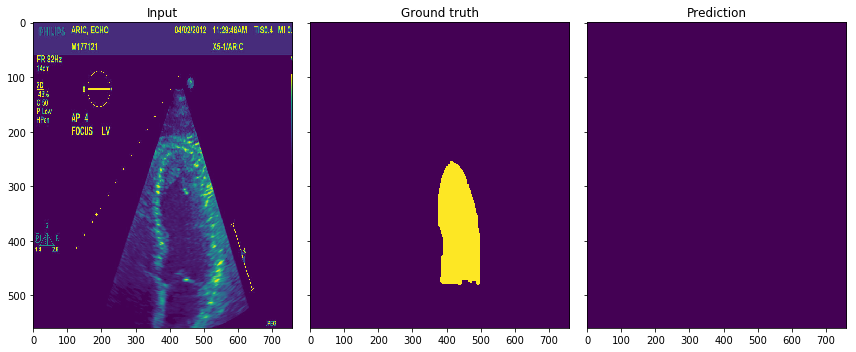

In [17]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("first_training.png")